In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plta
figsize(11, 9)
import scipy.stats as stats
import pymc3 as pm
import seaborn as sb


# Presentation:

Nous allons analyser l'impact des posters de batman

In [4]:
n = 1000 #donc 2000 personne en total , 1000 pour le groupe 1 eet 1000 pour le group 2

obs_v1 = 680 # vote pour le poster 1
obs_v2 = 700 # vote pour le poster 2

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\m.randrianarivony\AppData\Local\Continuum\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\m.randrianarivony\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://

# Version Statiques Inferentielle

In [5]:
res_v1 = np.zeros(n)
res_v1[:obs_v1] = 1 

In [6]:
res_v2 = np.zeros(n)
res_v2[:obs_v2] = 1 

In [7]:
stats.ttest_ind(res_v1,res_v2)

Ttest_indResult(statistic=-0.9667048367247598, pvalue=0.3338086042871985)

p-value >0.05 ====>Not significant

# Version Bayesien

In [8]:
with pm.Model() as model: # context management
    # loi betha pour les paramètre du binomal , car c'est continue de [0,1]
    prior_v1 = pm.Beta('prior_v1', alpha=2, beta=2)
    prior_v2 = pm.Beta('prior_v2', alpha=2, beta=2)

    # binomial parce que  Voter ou Ne pas Voter les poster
    like_v1 = pm.Binomial('like_v1', n=n, p=prior_v1, observed=obs_v1)
    like_v2 = pm.Binomial('like_v2', n=n, p=prior_v2, observed=obs_v2)
    
    
    pm.Deterministic('difference', prior_v2 - prior_v1)
    pm.Deterministic('rapport', (prior_v2/prior_v1) - 1)
    
    trace = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)

C:\Users\m.randrianarivony\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -154.95, ||grad|| = 269.07: 100%|█████████████████████████████████████████████████| 7/7 [00:00<00:00, 79.55it/s]
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [prior_v2]
>Metropolis: [prior_v1]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [03:28<00:00, 970.45draws/s]
The number of effective samples is smaller than 10% for some parameters.


TypeError: plot_trace() got an unexpected keyword argument 'grid'

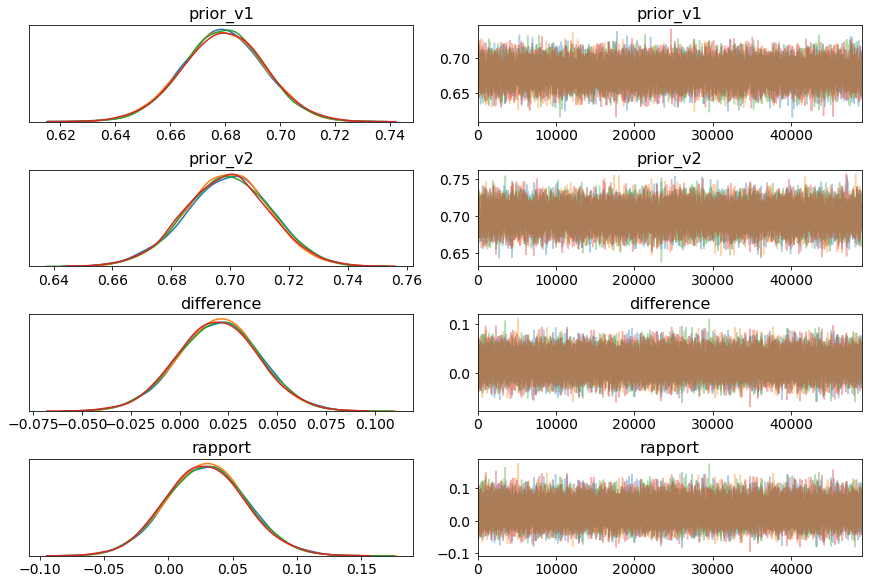

In [9]:
_ = pm.traceplot(trace[1000:])

à gauche la distribution , à droite les données générer

p1= centree 0.68

p2 =0.70

In [10]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
prior_v1,0.679319,0.014699,0.000089,0.650383,0.707899,19821.681348,1.000043
prior_v2,0.699227,0.014375,0.000114,0.670620,0.727143,19757.058733,1.000219
difference,0.019908,0.020509,0.000153,-0.020661,0.059862,19018.028621,1.000213
rapport,0.029786,0.030694,0.000229,-0.031641,0.088983,19009.376984,1.000206


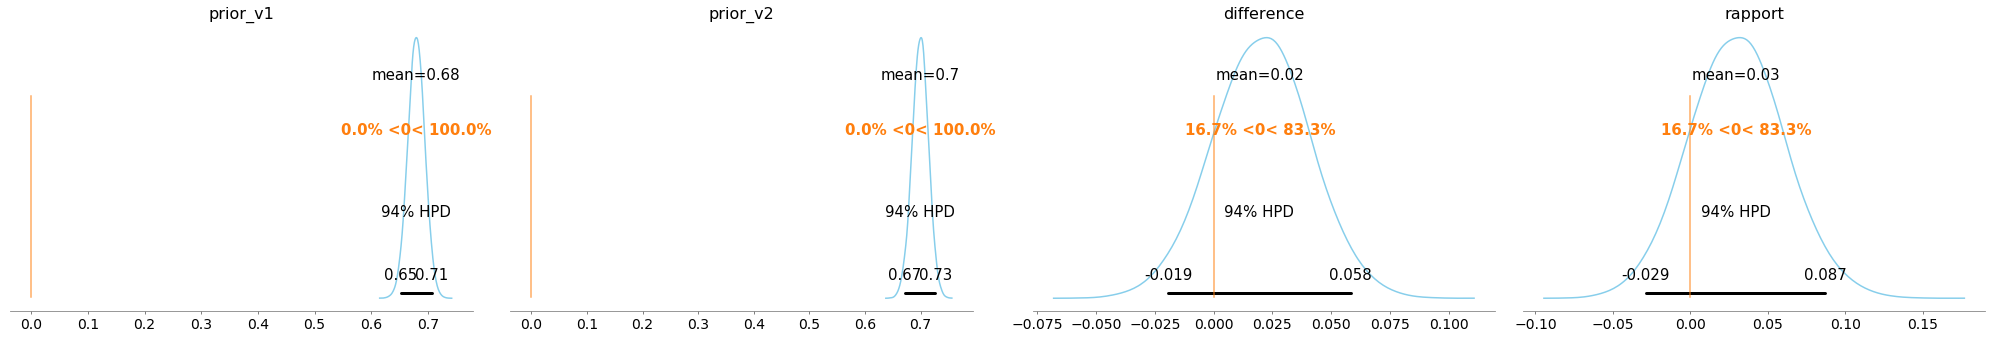

In [11]:
_ = pm.plot_posterior(trace[1000:], ref_val=0, color='#87ceeb')

HPD : higest posterior density